# Project: Default risk of Peer-to-Peer (P2P) lending

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Preprocessing</a></li>
<li><a href="#eda"> Exploratory Data Analysis (EDA)</a></li>
<li><a href="#conclusions">Feature Engineering </a></li>
<li><a href="#conclusions">Future Work</a></li>
</ul>



## Introduction :

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

### Importing Libraries :

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import plotly.express as px # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [2]:
df=pd.read_csv('Bondora_raw.csv')

In [3]:
df.shape

(134529, 112)

In [4]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [5]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

### Data Definitions :

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

## Data Preprocessing

#### Percentage of Missing Values

It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [6]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.374988717249494


We can notice that almost a quarter of the cells in this dataset are empty! In the next step, we're going to take a closer look at all of the columns with missing values and try to figure out what might be going on with them.

In [7]:
# Finding columns with a mean null values percentage above 40%
DropColList = df.columns[(df.isnull().mean()*100) >= 40].tolist()

In [8]:
# Displying columns with a mean null values percentage above 40%
df[DropColList].isnull().mean()*100

ContractEndDate                        56.155922
NrOfDependants                         73.537304
EmploymentPosition                     73.173070
WorkExperience                         72.851950
PlannedPrincipalTillDate               59.518765
CurrentDebtDaysPrimary                 63.934914
DebtOccuredOn                          63.934914
CurrentDebtDaysSecondary               61.160791
DebtOccuredOnForSecondary              61.160791
DefaultDate                            68.099815
PlannedPrincipalPostDefault            68.099815
PlannedInterestPostDefault             68.099815
EAD1                                   68.099815
EAD2                                   68.099815
PrincipalRecovery                      68.099815
InterestRecovery                       68.099815
RecoveryStage                          42.584127
EL_V0                                  96.603706
Rating_V0                              96.603706
EL_V1                                  90.394636
Rating_V1           

In [9]:
# Number of these columns
len(df.columns[(df.isnull().mean()*100) >= 40])

36

Removing all the features which have more than 40% missing values

In [10]:
# Now we can remove columns having more than 40% missing values
df.drop(columns= DropColList, axis= 1, inplace=True)

In [11]:
df.shape

(134529, 76)

In [12]:
df['NrOfScheduledPayments'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NrOfScheduledPayments, dtype: float64

Let's remove features such as “Loan ID”, “Loan number”, “UserName”, and "DateOfBirth"(because age is already present), since they are assigned to each loan (or borrower) mainly for data storage and identification purposes and are meaningless for default prediction.

In [13]:
df.drop(columns=['LoanId', 'LoanNumber', 'UserName', 'DateOfBirth', 'County', 'City'], inplace = True)

As IncomeTotal is persent, we can drop "IncomeFromPrincipalEmployer", "IncomeFromPension",
"IncomeFromFamilyAllowance", "IncomeFromSocialWelfare","IncomeFromLeavePay", "IncomeFromChildSupport", and "IncomeOther" columns

In [14]:
df.drop(columns=['IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
                 'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther'], inplace = True)

Let's remove unnecessary date features as we don't work on a time series study

In [15]:
df.drop(columns=['ReportAsOfEOD', 'ListedOnUTC', 'BiddingStartedOn', 'LoanApplicationStartedDate', 'LastPaymentOn',
                 'MonthlyPaymentDay','LoanDate', 'FirstPaymentDate', 'MaturityDate_Original','MaturityDate_Last'], 
        inplace = True)

Let's Remove other features that have no effecto on our analysis

In [16]:
df.drop(columns=['NextPaymentNr', 'NrOfScheduledPayments', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 
                 'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'ExpectedLoss','LossGivenDefault',
                'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'StageActiveSince', 
                'ModelVersion', 'WorseLateCategory'], inplace = True)

In [17]:
df.shape

(134529, 39)

#### Creating Target Variable

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**. There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
So we will first filter out all the current status records because they are not matured yet they are current loans. 

Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

In [18]:
# Add DefaultDate Column to our df dataset
df["DefaultDate"] = pd.read_csv('Bondora_raw.csv',low_memory=False).DefaultDate

In [19]:
# let's find the counts of each status categories 
df.Status.value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [20]:
# filtering out Current Status records
df = df[df.Status != 'Current']

In [21]:
df.Status.value_counts()

Late      45772
Repaid    31622
Name: Status, dtype: int64

In [22]:
df.shape

(77394, 40)

In [23]:
# Rplace any null value by NoDefault in DefaultDate column
df.DefaultDate.fillna('NoDefault', inplace = True)

In [24]:
# Replace any Date by Defalut
for i in range(len(df.DefaultDate.values)):
    if df.DefaultDate.values[i] != 'NoDefault':
        df.DefaultDate.values[i] = 'Default'

In [25]:
# check the counts of default and nondefault 
df.DefaultDate.value_counts()

Default      42794
NoDefault    34600
Name: DefaultDate, dtype: int64

In [26]:
# let's drop the status columns
df.drop(columns=['Status'], inplace = True)

In [27]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultDate
0,0,0,115.0410,True,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NoDefault
1,0,0,140.6057,False,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NoDefault
2,0,0,319.5580,True,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,Default
3,0,0,57.5205,True,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NoDefault
4,0,0,319.5582,True,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,Default


Now, we will rename DefaultDate taarget column to "LoanStatus", so "LoanStatus" is our target variable

In [28]:
# Rename DefaultDate column to LoanStatus
df.rename(columns={'DefaultDate':'LoanStatus'}, inplace = True)

In [29]:
df.LoanStatus.value_counts()

Default      42794
NoDefault    34600
Name: LoanStatus, dtype: int64

#### Checking datatype of all features
In this step we will see any data type mismatch

In [30]:
# write your code here
df.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
VerificationType                          float64
LanguageCode                                int64
Age                                         int64
Gender                                    float64
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
Education                                 float64
MaritalStatus                             float64
EmploymentStatus                          float64
EmploymentDurationCurrentEmployer          object
OccupationArea                            float64


- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc.
- So we will convert these features to categorical features

- For verification column:

In [31]:
# Replace Null values by 'Not Set'
df.VerificationType.fillna('Not Set', inplace = True)

In [32]:
# convert from float type to string first
df['VerificationType'] = df['VerificationType'].astype(object)

for i in range(len(df.VerificationType.values)):
    df.VerificationType.values[i] = str(df.VerificationType.values[i])

In [33]:
df.VerificationType.dtype, type(df.VerificationType.values[0])

(dtype('O'), str)

In [34]:
# From Bonora dataser we can find that:
# 0 Not set, 1 Income unverified, 2 Income unverified, cross-referenced by phone, 3 Income verified 
df.VerificationType = df.VerificationType.str.replace('0.0', 'Not Set')
df.VerificationType = df.VerificationType.str.replace('1.0', 'Income unverified')
df.VerificationType = df.VerificationType.str.replace('2.0', 'Income unverified,cross-referenced by phone')
df.VerificationType = df.VerificationType.str.replace('3.0', 'Income verified')
df.VerificationType = df.VerificationType.str.replace('4.0', 'Income and expenses verified')

In [35]:
df.VerificationType.value_counts()

Income and expenses verified                   41428
Income unverified                              25626
Income verified                                 8460
Income unverified,cross-referenced by phone     1827
Not Set                                           53
Name: VerificationType, dtype: int64

- For Gender column:

In [36]:
df.Gender.value_counts()

0.0    50697
1.0    20927
2.0     5725
Name: Gender, dtype: int64

In [37]:
# Replace Null values by Undefined
df.Gender.fillna('Undefined', inplace = True)

In [38]:
# Convert from int types to string first
df['Gender'] = df['Gender'].astype(object)

for i in range(len(df.Gender.values)):
    df.Gender.values[i] = str(df.Gender.values[i])

In [39]:
df.Gender.dtype, type(df.Gender.values[0])

(dtype('O'), str)

In [40]:
# From Bonora dataser we can find that:
## 0.0 Male 1.0 Female 2.0 Undefined
df.Gender = df.Gender.str.replace('0.0', 'Male')
df.Gender = df.Gender.str.replace('1.0', 'Female')
df.Gender = df.Gender.str.replace('2.0', 'Undefined')

In [41]:
# Check
df.Gender.value_counts()

Male         50697
Female       20927
Undefined     5770
Name: Gender, dtype: int64

- Let's handle LanguageCode column :

In [42]:
df.LanguageCode.value_counts()

1     33239
4     20302
6     16407
3      6534
2       603
9       293
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: LanguageCode, dtype: int64

In [43]:
# Convert from int types to string first
df.LanguageCode = df.LanguageCode.astype(object)

for i in range(len(df.LanguageCode.values)):
    df.LanguageCode.values[i] = str(df.LanguageCode.values[i])

In [44]:
df.LanguageCode.dtype, type(df.LanguageCode.values[0])

(dtype('O'), str)

In [45]:
df.LanguageCode.value_counts()

1     33239
4     20302
6     16407
3      6534
2       603
9       293
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: LanguageCode, dtype: int64

In [46]:
# From Bonora dataser we can find that:
## 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian
### We will give 'Other' to other Language code
#### You should handle 'Other' first
df.LanguageCode = df.LanguageCode.str.replace('7',  'Other')
df.LanguageCode = df.LanguageCode.str.replace('10', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('13', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('15', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('21', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('22', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('1', 'Estonian')
df.LanguageCode = df.LanguageCode.str.replace('2', 'English')
df.LanguageCode = df.LanguageCode.str.replace('3', 'Russian')
df.LanguageCode = df.LanguageCode.str.replace('4', 'Finnish')
df.LanguageCode = df.LanguageCode.str.replace('5', 'German')
df.LanguageCode = df.LanguageCode.str.replace('6', 'Spanish')
df.LanguageCode = df.LanguageCode.str.replace('9', 'Slovakian')

In [47]:
# Check
df.LanguageCode.value_counts()

Estonian     33239
Finnish      20302
Spanish      16407
Russian       6534
English        603
Slovakian      293
Other           11
German           5
Name: LanguageCode, dtype: int64

- Let's handle UseOfLoan column :

In [48]:
df.UseOfLoan.value_counts()

-1      44177
 7       8926
 2       8102
 0       6419
 6       2884
 3       1743
 5       1621
 8       1367
 4       1259
 1        843
 102       21
 110       17
 104        6
 101        5
 107        2
 108        1
 106        1
Name: UseOfLoan, dtype: int64

In [49]:
# Convert from int types to string first
df.UseOfLoan = df.UseOfLoan.astype(object)

for i in range(len(df.UseOfLoan.values)):
    df.UseOfLoan.values[i] = str(df.UseOfLoan.values[i])

In [50]:
df.UseOfLoan.dtype, type(df.UseOfLoan.values[0])

(dtype('O'), str)

In [51]:
# From Bondora dataset and Bondora Statistics Page we can find that:
## -1 Not Set, 0 Loan consolidation , 1 Real estate, 2 Home improvement, 3 Business, 4 Education, 5 Travel, 6 Vehicle, 7 Other,
## 8 Health, 102  Purchase of machinery equipment, 110 Other business, 104 Accounts receivable financing, 
## 101 Working capital financing, 107 Acquisition of stocks, 108 Acquisition of real estate, 106 Acquisition of means of transport

df.UseOfLoan = df.UseOfLoan.str.replace('102', 'Purchase of machinery equipment')
df.UseOfLoan = df.UseOfLoan.str.replace('110', 'Other business')
df.UseOfLoan = df.UseOfLoan.str.replace('104', 'Accounts receivable financing')
df.UseOfLoan = df.UseOfLoan.str.replace('101', 'Working capital financing')
df.UseOfLoan = df.UseOfLoan.str.replace('107', 'Acquisition of stocks')
df.UseOfLoan = df.UseOfLoan.str.replace('106', 'Acquisition of means of transport')
df.UseOfLoan = df.UseOfLoan.str.replace('108', 'Acquisition of real estate')

df.UseOfLoan = df.UseOfLoan.str.replace('-1',  'Not Set')
df.UseOfLoan = df.UseOfLoan.str.replace('0',   'Loan consolidation')
df.UseOfLoan = df.UseOfLoan.str.replace('1',   'Real estate')
df.UseOfLoan = df.UseOfLoan.str.replace('2',   'Home improvement')
df.UseOfLoan = df.UseOfLoan.str.replace('3',   'Business')
df.UseOfLoan = df.UseOfLoan.str.replace('4',   'Education')
df.UseOfLoan = df.UseOfLoan.str.replace('5',   'Travel')
df.UseOfLoan = df.UseOfLoan.str.replace('6',   'Vehicle')
df.UseOfLoan = df.UseOfLoan.str.replace('7',   'Other')
df.UseOfLoan = df.UseOfLoan.str.replace('8',   'Health')

In [52]:
# Check
df.UseOfLoan.value_counts()

Not Set                              44177
Other                                 8926
Home improvement                      8102
Loan consolidation                    6419
Vehicle                               2884
Business                              1743
Travel                                1621
Health                                1367
Education                             1259
Real estate                            843
Purchase of machinery equipment         21
Other business                          17
Accounts receivable financing            6
Working capital financing                5
Acquisition of stocks                    2
Acquisition of real estate               1
Acquisition of means of transport        1
Name: UseOfLoan, dtype: int64

- Let's handle Education column :

In [53]:
# We will replace Null values
df.Education.fillna('Not Present', inplace = True)

In [54]:
df.Education.value_counts()

4.0            28557
5.0            20919
3.0            17257
2.0             5379
1.0             5226
Not Present       45
0.0                8
-1.0               3
Name: Education, dtype: int64

In [55]:
# Convert from int types to string first
df.Education = df.Education.astype(object)

for i in range(len(df.Education.values)):
    df.Education.values[i] = str(df.Education.values[i])

In [56]:
# We will replace 0 and -1 by "Not Present".
## And from Bondora dataset and Bondora Statistics Page we can find that:
## 1 Primary education, 2 Basic education, 3 Vocational education, 4 Secondary education, 5 Higher education.
df.Education = df.Education.str.replace('-1.0',  'Not Present')
df.Education = df.Education.str.replace('0.0',   'Not Present')
df.Education = df.Education.str.replace('1.0',   'Primary education')
df.Education = df.Education.str.replace('2.0',   'Basic education')
df.Education = df.Education.str.replace('3.0',   'Vocational education')
df.Education = df.Education.str.replace('4.0',   'Secondary education')
df.Education = df.Education.str.replace('5.0',   'Higher education')

In [57]:
# Check
df.Education.value_counts()

Secondary education     28557
Higher education        20919
Vocational education    17257
Basic education          5379
Primary education        5226
Not Present                56
Name: Education, dtype: int64

- Let's handle MaritalStatus column :

In [58]:
df.MaritalStatus.value_counts()

-1.0    44177
 3.0    11504
 1.0     9585
 2.0     8479
 4.0     3077
 5.0      519
 0.0        8
Name: MaritalStatus, dtype: int64

In [59]:
# Replace Null values by "Not Specified"
df.MaritalStatus.fillna('Not Specified', inplace = True)

In [60]:
# Convert from int types to string first
df.MaritalStatus = df.MaritalStatus.astype(object)

for i in range(len(df.MaritalStatus.values)):
    df.MaritalStatus.values[i] = str(df.MaritalStatus.values[i])

In [61]:
# Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified
## And from Bondora dataser:
## 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow
df.MaritalStatus = df.MaritalStatus.str.replace('-1.0',  'Not Specified')
df.MaritalStatus = df.MaritalStatus.str.replace('0.0',   'Not Specified')
df.MaritalStatus = df.MaritalStatus.str.replace('1.0',   'Married')
df.MaritalStatus = df.MaritalStatus.str.replace('2.0',   'Cohabitant')
df.MaritalStatus = df.MaritalStatus.str.replace('3.0',   'Single')
df.MaritalStatus = df.MaritalStatus.str.replace('4.0',   'Divorced')
df.MaritalStatus = df.MaritalStatus.str.replace('5.0',   'Widow')

In [62]:
# Check 
df.MaritalStatus.value_counts()

Not Specified    44230
Single           11504
Married           9585
Cohabitant        8479
Divorced          3077
Widow              519
Name: MaritalStatus, dtype: int64

- Let's handle EmploymentStatus :

In [63]:
df.EmploymentStatus.value_counts()

-1.0    44177
 3.0    27309
 5.0     1695
 6.0     1663
 4.0     1211
 2.0     1110
 0.0       32
Name: EmploymentStatus, dtype: int64

In [64]:
df.EmploymentStatus.fillna('Not present', inplace = True)

In [65]:
# Convert from int types to string first
df.EmploymentStatus = df.EmploymentStatus.astype(object)

for i in range(len(df.EmploymentStatus.values)):
    df.EmploymentStatus.values[i] = str(df.EmploymentStatus.values[i])

In [66]:
# Again EmploymentStatus of value 0 and -1 has no description so we will encode them as Not present
## And from Bondora dataser:
## 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree
df.EmploymentStatus = df.EmploymentStatus.str.replace('-1.0',  'Not present')
df.EmploymentStatus = df.EmploymentStatus.str.replace('0.0',   'Not present')
df.EmploymentStatus = df.EmploymentStatus.str.replace('2.0',   'Partially employed')
df.EmploymentStatus = df.EmploymentStatus.str.replace('3.0',   'Fully employed')
df.EmploymentStatus = df.EmploymentStatus.str.replace('4.0',   'Self-employed')
df.EmploymentStatus = df.EmploymentStatus.str.replace('5.0',   'Entrepreneur')
df.EmploymentStatus = df.EmploymentStatus.str.replace('6.0',   'Retiree')

In [67]:
# Check
df.EmploymentStatus.value_counts()

Not present           44406
Fully employed        27309
Entrepreneur           1695
Retiree                1663
Self-employed          1211
Partially employed     1110
Name: EmploymentStatus, dtype: int64

- Let's handle NewCreditCustomer column :

In [68]:
df.NewCreditCustomer.value_counts()

True     48867
False    28527
Name: NewCreditCustomer, dtype: int64

In [69]:
# Convert from int types to string first
df.NewCreditCustomer = df.NewCreditCustomer.astype(object)

for i in range(len(df.NewCreditCustomer.values)):
    df.NewCreditCustomer.values[i] = str(df.NewCreditCustomer.values[i])

- Let's handle Restructured column :

In [70]:
df.Restructured.value_counts()

False    61885
True     15509
Name: Restructured, dtype: int64

In [71]:
# Convert from int types to string first
df.Restructured = df.Restructured.astype(object)

for i in range(len(df.Restructured.values)):
    df.Restructured.values[i] = str(df.Restructured.values[i])

- Let's handle OccupationArea column :

In [72]:
# Replace Null values by "Not present"
df.OccupationArea.fillna('Not present', inplace = True)

In [73]:
df.OccupationArea.value_counts()

-1.0           44228
1.0             7640
7.0             3207
6.0             3007
3.0             2876
8.0             2276
17.0            2186
9.0             2106
10.0            1782
15.0            1555
16.0            1251
11.0            1054
19.0             893
14.0             798
4.0              530
18.0             524
13.0             493
12.0             433
5.0              342
2.0              116
Not present       86
0.0               11
Name: OccupationArea, dtype: int64

In [74]:
# Convert from int types to string first
df.OccupationArea = df.OccupationArea.astype(object)

for i in range(len(df.OccupationArea.values)):
    df.OccupationArea.values[i] = str(df.OccupationArea.values[i])

In [75]:
## We will replace -1 and 0 by "Not present"
## And from the Bonora dataset we find : 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 
## 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 
## 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 
## Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing
df.OccupationArea = df.OccupationArea.str.replace('10.0', 'Info and telecom')
df.OccupationArea = df.OccupationArea.str.replace('11.0', 'Finance and insurance')
df.OccupationArea = df.OccupationArea.str.replace('12.0', 'Real-estate')
df.OccupationArea = df.OccupationArea.str.replace('13.0', 'Research')
df.OccupationArea = df.OccupationArea.str.replace('14.0', 'Administrative')
df.OccupationArea = df.OccupationArea.str.replace('15.0', 'Civil service & military')
df.OccupationArea = df.OccupationArea.str.replace('16.0', 'Education')
df.OccupationArea = df.OccupationArea.str.replace('17.0', 'Healthcare and social help')
df.OccupationArea = df.OccupationArea.str.replace('18.0', 'Art and entertainment')
df.OccupationArea = df.OccupationArea.str.replace('19.0', 'Agriculture, forestry and fishing')
df.OccupationArea = df.OccupationArea.str.replace('-1.0', 'Not present')
df.OccupationArea = df.OccupationArea.str.replace('0.0',  'Not present')
df.OccupationArea = df.OccupationArea.str.replace('1.0', 'Other')
df.OccupationArea = df.OccupationArea.str.replace('2.0', 'Mining')
df.OccupationArea = df.OccupationArea.str.replace('3.0', 'Processing')
df.OccupationArea = df.OccupationArea.str.replace('4.0', 'Energy')
df.OccupationArea = df.OccupationArea.str.replace('5.0', 'Utilities')
df.OccupationArea = df.OccupationArea.str.replace('6.0', 'Construction')
df.OccupationArea = df.OccupationArea.str.replace('7.0', 'Retail and wholesale')
df.OccupationArea = df.OccupationArea.str.replace('8.0', 'Transport and warehousing')
df.OccupationArea = df.OccupationArea.str.replace('9.0',  'Hospitality and catering')

In [76]:
# Check
df.OccupationArea.value_counts()

Not present                          44325
Other                                 7640
Retail and wholesale                  3207
Construction                          3007
Processing                            2876
Transport and warehousing             2276
Healthcare and social help            2186
Hospitality and catering              2106
Info and telecom                      1782
Civil service & military              1555
Education                             1251
Finance and insurance                 1054
Agriculture, forestry and fishing      893
Administrative                         798
Energy                                 530
Art and entertainment                  524
Research                               493
Real-estate                            433
Utilities                              342
Mining                                 116
Name: OccupationArea, dtype: int64

- Let's handle HomeOwnershipType column :

In [77]:
df.HomeOwnershipType.value_counts()

 1.0     24594
 3.0     16842
 2.0     12776
 8.0      8762
 4.0      4031
 10.0     3179
 7.0      2701
 6.0      1362
 5.0       882
 9.0       565
 0.0        46
-1.0         2
Name: HomeOwnershipType, dtype: int64

In [78]:
# Replcae Null values by "Not specified"
df.HomeOwnershipType.fillna("Not specified", inplace = True)

In [79]:
# Convert from int types to string first
df.HomeOwnershipType = df.HomeOwnershipType.astype(object)

for i in range(len(df.HomeOwnershipType.values)):
    df.HomeOwnershipType.values[i] = str(df.HomeOwnershipType.values[i])

In [80]:
## We will replace -1 and 0 by "Not specified"
## And from the Bonora dataset we find : 0 Homeless 1 Owner 2 Living with parents 3 Tenant,pre-furnished property 
##4 Tenant,unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('10.0', 'Other')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('-1.0', 'Not specified')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('0.0',  'Homeless')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('1.0', 'Owner')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('2.0', 'Living with parents')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('3.0', 'Tenant,pre-furnished property')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('4.0', 'Tenant,pre-furnished property')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('5.0', 'Council house')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('6.0', 'Joint tenant')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('7.0', 'Joint ownership')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('8.0', 'Mortgage')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('9.0',  'Owner with encumbrance')

In [81]:
# Check 
df.HomeOwnershipType.value_counts()

Owner                            24594
Tenant,pre-furnished property    20873
Living with parents              12776
Mortgage                          8762
Other                             3179
Joint ownership                   2701
Not specified                     1654
Joint tenant                      1362
Council house                      882
Owner with encumbrance             565
Homeless                            46
Name: HomeOwnershipType, dtype: int64

- Let's handle HomeOwnershipType column :

In [82]:
df.Rating.value_counts()

F     15657
HR    13151
E     12288
D     11772
C     10420
B      6926
A      2819
AA     1633
Name: Rating, dtype: int64

In [83]:
# replace Null values by most frequent value
df.Rating.fillna('F', inplace = True)

In [84]:
# Check
df.Rating.value_counts()

F     18385
HR    13151
E     12288
D     11772
C     10420
B      6926
A      2819
AA     1633
Name: Rating, dtype: int64

- Let's handle CreditScoreEsMicroL column :

In [85]:
df.CreditScoreEsMicroL.value_counts()

M      39217
M1      4120
M5      2377
M2      1617
M3      1546
M4      1480
M6       556
M8       102
M9        70
M7        69
M10       54
Name: CreditScoreEsMicroL, dtype: int64

In [86]:
# rplace Null values by the most frequent value
df.CreditScoreEsMicroL.fillna('M', inplace = True)

In [87]:
# Check 
df.CreditScoreEsMicroL.isnull().sum()

0

- Let's handle EmploymentDurationCurrentEmployer column :

In [88]:
# replace Null values by "Other", to indicate that we  don't now exactly the Employment Duration Current Employer
df.EmploymentDurationCurrentEmployer.fillna("Other", inplace = True)

In [89]:
df.EmploymentDurationCurrentEmployer.value_counts()

MoreThan5Years    29328
UpTo1Year         14288
UpTo5Years        13777
UpTo2Years         5541
UpTo3Years         4539
Retiree            3344
UpTo4Years         3057
Other              2901
TrialPeriod         619
Name: EmploymentDurationCurrentEmployer, dtype: int64

- For the following columns, let's replace Null values by the avergae value of each column:

In [90]:
df.MonthlyPayment.fillna(df.MonthlyPayment.mean(), inplace = True)
df.DebtToIncome.fillna(df.DebtToIncome.mean(), inplace = True)
df.FreeCash.fillna(df.FreeCash.mean(), inplace = True) 
df.PreviousRepaymentsBeforeLoan.fillna(df.PreviousRepaymentsBeforeLoan.mean(), inplace = True)

#### Now we have  a clean dataset with a proper data types. 

# Exploratory Data Analysis (EDA):
### Now we can see the relationship between  features and the target feature which is "LoanStatus":

In [92]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,LoanStatus
0,0,0,115.0410,True,"Income unverified,cross-referenced by phone",Estonian,61,Female,EE,319.5582,115.0408,30.0,12,130.393314,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Not specified,10500.0,0,0.0,0,0.0,0.0,F,False,M,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NoDefault
1,0,0,140.6057,False,"Income unverified,cross-referenced by phone",Estonian,48,Female,EE,191.7349,140.6057,25.0,1,130.393314,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Not specified,10800.0,0,0.0,0,0.0,0.0,F,False,M,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NoDefault
2,0,0,319.5580,True,"Income unverified,cross-referenced by phone",Estonian,58,Female,EE,319.5582,319.5409,25.0,20,130.393314,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Not specified,7000.0,0,0.0,0,0.0,0.0,F,True,M,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,Default
3,0,0,57.5205,True,"Income unverified,cross-referenced by phone",Estonian,23,Female,EE,127.8233,57.5205,45.0,15,130.393314,Loan consolidation,Basic education,Single,Not present,UpTo2Years,Other,Not specified,11600.0,0,0.0,0,0.0,0.0,F,False,M,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NoDefault
4,0,0,319.5582,True,"Income unverified,cross-referenced by phone",Estonian,25,Female,EE,319.5582,319.5436,30.0,12,130.393314,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Not specified,6800.0,0,0.0,0,0.0,0.0,F,False,M,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,Default


## Categorical features distribution :

In [93]:
df.select_dtypes([object, bool]).columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'Country', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'LoanStatus'],
      dtype='object')

####  Percentage of Defaulted loans in the dataset :

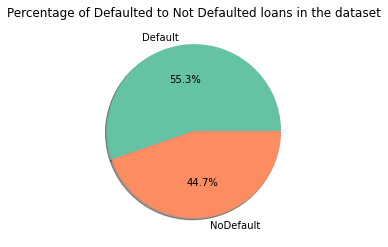

In [94]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.LoanStatus.value_counts().values, labels = df.LoanStatus.value_counts().index,
        explode=[0, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of Defaulted to Not Defaulted loans in the dataset")        
  
# displaying chart
plt.show()

We have 55.3% Defaulted loans

#### Residency of the Defaulters :

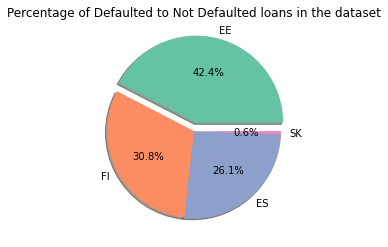

In [95]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.Country[df.LoanStatus == 'Default'].value_counts().values, 
        labels = df.Country[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0.1, 0, 0,0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of Defaulted to Not Defaulted loans in the dataset")        
  
# displaying chart
plt.show()

- Estonia has the most number of Defaulters.

#### Gender distribution of defaulters :

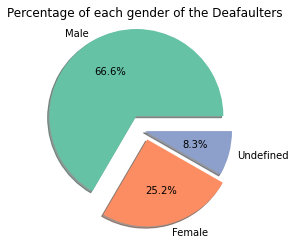

In [96]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.Gender[df.LoanStatus == 'Default'].value_counts().values, 
        labels = df.Gender[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0.2, 0.1, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of each gender of the Deafaulters")        
  
# displaying chart
plt.show()

- We notice that the majority of the defaulters are Males.

#### Check if the most Defaluters are New Credit Customers or not :

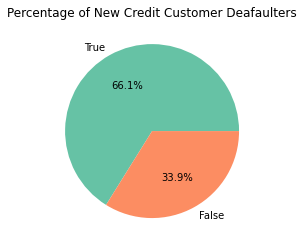

In [97]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.NewCreditCustomer[df.LoanStatus == 'Default'].value_counts().values, 
        labels = df.NewCreditCustomer[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = False)
plt.title("Percentage of New Credit Customer Deafaulters")        
  
# displaying chart
plt.show()

- We can see that most of the Defaulters are New Credit Users.

#### Language Code Distribution of the Defaulters :

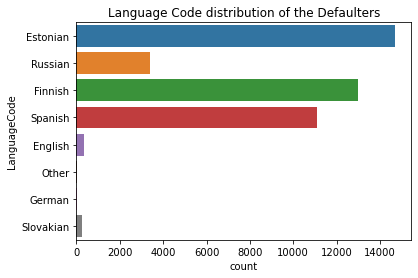

In [98]:
sns.countplot(y = df.LanguageCode[df.LoanStatus == 'Default'])
plt.title('Language Code distribution of the Defaulters');

- It's obvious that Estonian, Finnish, and Spanish-speaking borrowers defaulted most which is but obvious as this peer-to-peer lending platform is basically targeted to European countries.

#### Education wise distribution of defaulters :

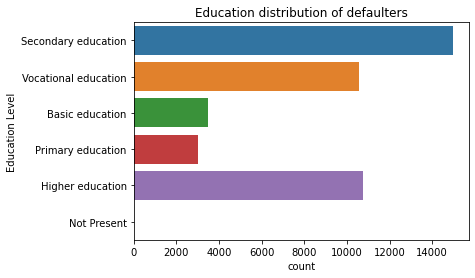

In [99]:
sns.countplot(data=df, y = df.Education[df.LoanStatus == 'Default'])
plt.title('Education distribution of defaulters')
plt.ylabel('Education Level');

- We can notice that borrowers with Secondary education have the largets number of Defaulters, then those with Full time job.

#### Employment Status distribution of the Defaulters :

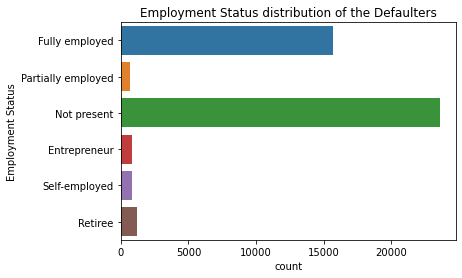

In [100]:
sns.countplot(data=df, y = df.EmploymentStatus[df.LoanStatus == 'Default'])
plt.title('Employment Status distribution of the Defaulters')
plt.ylabel('Employment Status');

#### Marital Status distribution of the Defaulters :

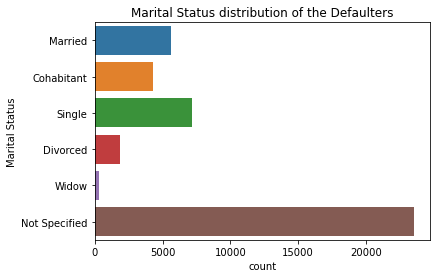

In [101]:
sns.countplot(data=df, y = df.MaritalStatus[df.LoanStatus == 'Default'])
plt.title('Marital Status distribution of the Defaulters')
plt.ylabel('Marital Status');

- we can observe that borrowers having no clear Marital Status are defaulted the most, then those with single marital status. 

#### Distribution of Loan purpose the Defaulters :

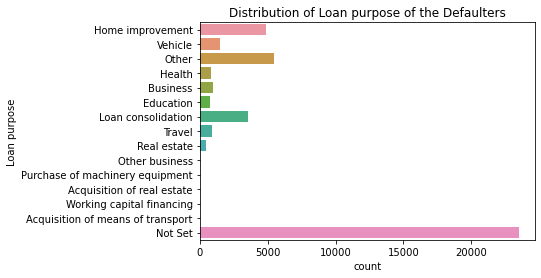

In [102]:
sns.countplot(data=df, y = df.UseOfLoan[df.LoanStatus == 'Default'])
plt.title('Distribution of Loan purpose of the Defaulters')
plt.ylabel('Loan purpose');

-  we can observe that those loans having no clear purpose defaulted most, while others and home improvement purpose are second and third most defaulted loans.



#### Distribution of Employment Duration of the Defaulters :

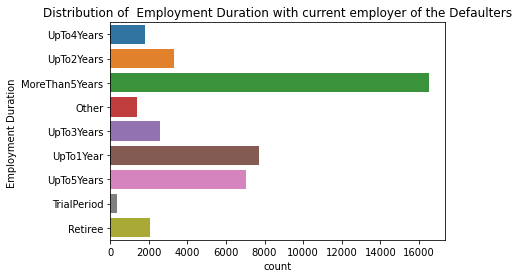

In [103]:
sns.countplot(data=df, y = df.EmploymentDurationCurrentEmployer[df.LoanStatus == 'Default'])
plt.title('Distribution of  Employment Duration with current employer of the Defaulters')
plt.ylabel('Employment Duration ');

- Most defaulters are those who have employment of more than 5 years while the second most defaulted loans come from the borrowers who have employment up to 1 year. 
- That’s really surprising that most experienced professionals defaulted the most.

#### Distribution of Occupation Area of the Defaulters :

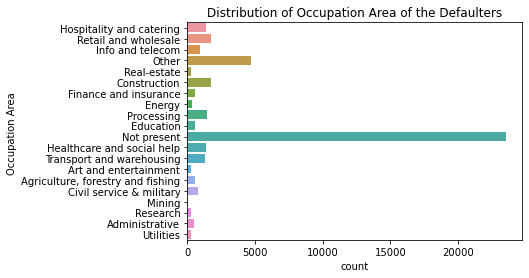

In [104]:
sns.countplot(data=df, y = df.OccupationArea[df.LoanStatus == 'Default'])
plt.title('Distribution of Occupation Area of the Defaulters')
plt.ylabel('Occupation Area ');

- Most defaulters are those who didn't state their Occupation Area.

#### Distribution of Home Ownership Type of the Defaulters :

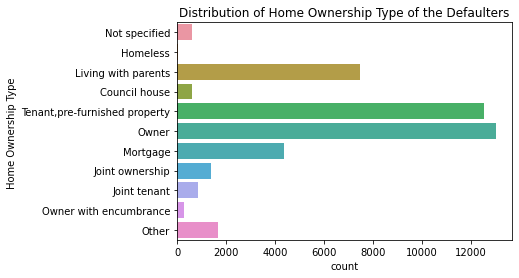

In [105]:
sns.countplot(data=df, y = df.HomeOwnershipType[df.LoanStatus == 'Default'])
plt.title('Distribution of Home Ownership Type of the Defaulters')
plt.ylabel('Home Ownership Type ');

- Most defaulters are those who have a home, while the second most defaulted loans come from the borrowers who have Tenant, pre-furnished property.
- That’s really surprising that borrower having a home are defaulted the most.

#### Distribution of Ratings of the Defaulters :

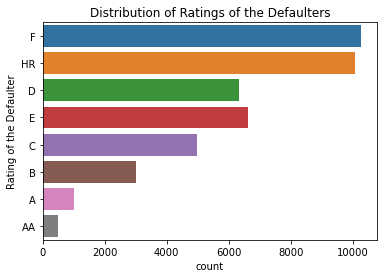

In [106]:
sns.countplot(data=df, y = df.Rating[df.LoanStatus == 'Default'])
plt.title('Distribution of Ratings of the Defaulters')
plt.ylabel('Rating of the Defaulter');

- Borrower with a rating F is defaulted the most.

#### Distribution of Credit Score EsMicroL of the Defaulters :

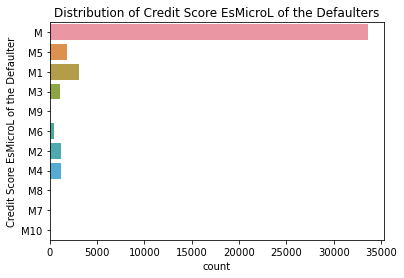

In [107]:
sns.countplot(data=df, y = df.CreditScoreEsMicroL[df.LoanStatus == 'Default'])
plt.title('Distribution of Credit Score EsMicroL of the Defaulters')
plt.ylabel('Credit Score EsMicroL of the Defaulter');

- Borrower with a Credit Score EsMicroL M is defaulted the most.

In [108]:
col_list_cate = df.select_dtypes(include=['object']).columns.to_list()

In [109]:
# write your code here
for col in col_list_cate:
    print(col)
    print(df[col].unique())

NewCreditCustomer
['True' 'False']
VerificationType
['Income unverified,cross-referenced by phone'
 'Income and expenses verified' 'Income unverified' 'Income verified'
 'Not Set']
LanguageCode
['Estonian' 'Russian' 'English' 'Finnish' 'Spanish' 'Other' 'Slovakian'
 'German']
Gender
['Female' 'Male' 'Undefined']
Country
['EE' 'FI' 'ES' 'SK']
UseOfLoan
['Other' 'Home improvement' 'Loan consolidation' 'Vehicle' 'Health'
 'Business' 'Travel' 'Education' 'Real estate' 'Other business'
 'Working capital financing' 'Purchase of machinery equipment'
 'Accounts receivable financing' 'Acquisition of real estate'
 'Acquisition of means of transport' 'Acquisition of stocks' 'Not Set']
Education
['Vocational education' 'Higher education' 'Secondary education'
 'Basic education' 'Primary education' 'Not Present']
MaritalStatus
['Married' 'Divorced' 'Single' 'Cohabitant' 'Widow' 'Not Specified']
EmploymentStatus
['Fully employed' 'Not present' 'Partially employed' 'Self-employed'
 'Entrepreneur' 'Re

## Label encoding for further deployment part

In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({'index':[0,1,2,3,4],
        'Verification':['Income unverified','cross-referenced by phone',
 'Income and expenses verified', 'Income unverified' 'Income verified',
 'Not Set']})
data['Verification_encoded'] = le.fit_transform(data['Verification'].values)
data = data.drop_duplicates('Verification').set_index('index')
print(data)

                           Verification  Verification_encoded
index                                                        
0                     Income unverified                     1
1             cross-referenced by phone                     4
2          Income and expenses verified                     0
3      Income unverifiedIncome verified                     2
4                               Not Set                     3


In [111]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Languagecode':['Estonian','Russian','English','Finnish','Spanish','Other','Slovakian',
 'German']})
data['language_encoded'] = le.fit_transform(data['Languagecode'].values)
data = data.drop_duplicates('Languagecode')
print(data)

  Languagecode  language_encoded
0     Estonian                 1
1      Russian                 5
2      English                 0
3      Finnish                 2
4      Spanish                 7
5        Other                 4
6    Slovakian                 6
7       German                 3


In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'COuntry':['EE','FI','ES','SK']})
data['COuntry_encoded'] = le.fit_transform(data['COuntry'].values)
data = data.drop_duplicates('COuntry')
print(data)

  COuntry  COuntry_encoded
0      EE                0
1      FI                2
2      ES                1
3      SK                3


In [113]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Employeement Status': ['Fully employed','Not present' ,'Partially employed' ,'Self-employed',
 'Entrepreneur', 'Retiree']})
data['Employeement Status_encoded'] = le.fit_transform(data['Employeement Status'].values)
data = data.drop_duplicates('Employeement Status')
print(data)

  Employeement Status  Employeement Status_encoded
0      Fully employed                            1
1         Not present                            2
2  Partially employed                            3
3       Self-employed                            5
4        Entrepreneur                            0
5             Retiree                            4


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'CreditScoreEsMicroL':['M' ,'M3' ,'M5', 'M1', 'M9', 'M2', 'M6', 'M4', 'M8', 'M7' ,'M10']})
data['CreditScoreEsMicroL_encoded'] = le.fit_transform(data['CreditScoreEsMicroL'].values)
data = data.drop_duplicates('CreditScoreEsMicroL')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Use of loan':['Other' 'Home improvement', 'Loan consolidation' ,'Vehicle' ,'Health',
 'Business', 'Travel', 'Education' ,'Real estate', 'Other business',
 'Working capital financing', 'Purchase of machinery equipment',
 'Accounts receivable financing' ,'Acquisition of real estate',
 'Acquisition of means of transport', 'Acquisition of stocks' ,'Not Set']})
data['Use of loan_encoded'] = le.fit_transform(data['Use of loan'].values)
data = data.drop_duplicates('Use of loan')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'New Credit Customer':['True', 'False']})
data['New Credit Customer_encoded'] = le.fit_transform(data['New Credit Customer'].values)
data = data.drop_duplicates('New Credit Customer')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Current Employement':['UpTo3Years', 'MoreThan5Years', 'UpTo4Years' ,'UpTo2Years', 'UpTo1Year',
 'Other', 'UpTo5Years' ,'TrialPeriod' ,'Retiree']})
data['Current Employement_encoded'] = le.fit_transform(data['Current Employement'].values)
data = data.drop_duplicates('Current Employement')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Gender':['Female', 'Male', 'Undefined']})
data['Gender_encoded'] = le.fit_transform(data['Gender'].values)
data = data.drop_duplicates('Gender')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Occupation Area':['Retail and wholesale' ,'Education', 'Hospitality and catering', 'Other',
 'Info and telecom', 'Real-estate', 'Transport and warehousing',
 'Construction', 'Finance and insurance', 'Healthcare and social help',
 'Utilities', 'Energy', 'Processing', 'Agriculture, forestry and fishing',
 'Not present', 'Art and entertainment', 'Civil service & military',
 'Research', 'Administrative', 'Mining']})
data['Occupation Area_encoded'] = le.fit_transform(data['Occupation Area'].values)
data = data.drop_duplicates('Occupation Area')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Martial Status':['Married', 'Divorced', 'Single' ,'Cohabitant' ,'Widow', 'Not Specified']})
data['Martial Status_encoded'] = le.fit_transform(data['Martial Status'].values)
data = data.drop_duplicates('Martial Status')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Education':['Vocational education' ,'Higher education' ,'Secondary education',
 'Basic education', 'Primary education', 'Not Present']})
data['Education_encoded'] = le.fit_transform(data['Education'].values)
data = data.drop_duplicates('Education')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Rating':['F', 'C' ,'HR', 'E', 'D', 'A', 'B', 'AA']})
data['Rating_encoded'] = le.fit_transform(data['Rating'].values)
data = data.drop_duplicates('Rating')
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({
        'Home_Ownership type':['Not specified', 'Homeless' ,'Tenant,pre-furnished property',
 'Living with parents', 'Council house', 'Owner' 'Mortgage',
 'Joint ownership', 'Joint tenant', 'Owner with encumbrance', 'Other']})
data['Home_Ownership type_encoded'] = le.fit_transform(data['Home_Ownership type'].values)
data = data.drop_duplicates('Home_Ownership type')
print(data)

## Numerical features distribution :

In [114]:
df.select_dtypes(int).columns

Index(['BidsPortfolioManager', 'BidsApi', 'Age', 'LoanDuration',
       'ExistingLiabilities', 'RefinanceLiabilities',
       'NoOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

In [115]:
df.select_dtypes(float).columns

Index(['BidsManual', 'AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment',
       'IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome', 'FreeCash',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan'],
      dtype='object')

#### Age distribution of the Defaulters :

In [116]:
df.Age[df.LoanStatus=='Default'].describe()

count    42794.000000
mean        40.128523
std         12.427852
min          0.000000
25%         30.000000
50%         39.000000
75%         49.000000
max         77.000000
Name: Age, dtype: float64

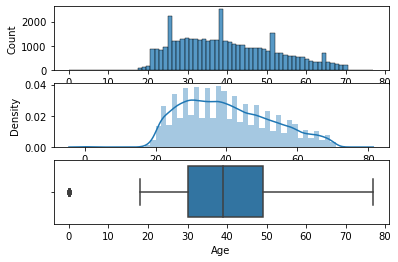

In [117]:
fig, axs = plt.subplots(nrows= 3)

sns.histplot(df.Age[df.LoanStatus=='Default'], ax=axs[0]);
sns.distplot(df.Age[df.LoanStatus=='Default'], ax=axs[1])
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[2]);


- Mean Age = Median Age which is about 40 years
- The data is almost Symmetric.
- There is only one Outlier


#### Monthly Payment distribution of the Defaulters :

In [118]:
df.MonthlyPayment.describe()

count    77394.000000
mean       130.393314
std        125.725231
min          0.000000
25%         43.070000
50%        113.040000
75%        162.107500
max       2368.540000
Name: MonthlyPayment, dtype: float64

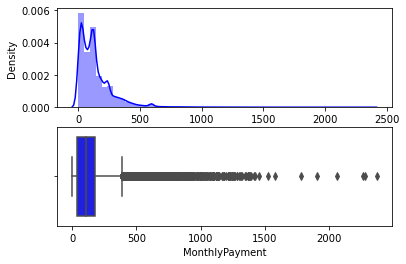

In [119]:
fig, axs = plt.subplots(nrows=2)
sns.distplot(df.MonthlyPayment[df.LoanStatus=='Default'], ax=axs[0], color='blue')
sns.boxplot(df.MonthlyPayment[df.LoanStatus=='Default'], ax=axs[1], color='blue');

- Mean value is 130, it's smaller and mean that the monthly payments of the Defaulters are smaller.
- We notice that the data is right skewed. This means that the smaller values occur in the data with higher frequency and the larger values occur with comparatively lesser frequency, so the Defaulters have a small monthly payments.
- There are a large number of Outliers above the upper limit.

#### AppliedAmount & Amount distribution of the Defaulters :

In [120]:
df.Amount.describe()

count    77394.000000
mean      2472.673771
std       2163.710046
min          6.390000
25%        740.000000
50%       2020.000000
75%       3185.000000
max      10632.000000
Name: Amount, dtype: float64

In [121]:
df.AppliedAmount.describe()

count    77394.000000
mean      2746.981169
std       2463.487043
min         31.955800
25%        740.000000
50%       2125.000000
75%       3720.000000
max      10632.000000
Name: AppliedAmount, dtype: float64

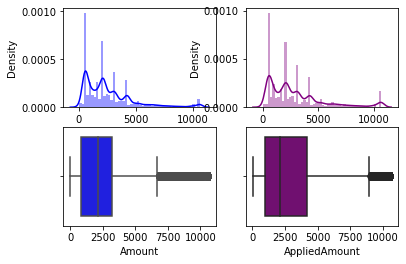

In [122]:
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.distplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[1,0], color='blue');

sns.distplot(df.AppliedAmount[df.LoanStatus=='Default'], ax=axs[0,1], color='purple')
sns.boxplot(df.AppliedAmount[df.LoanStatus=='Default'], ax=axs[1,1], color='purple');


- Mean value of The amount of money the Defaulter applied for originally is 2746, and what he/she recieves is 2472
- Data is right skewed in both.
- There is a large number of Outliers in both.

#### Previous Repayments Before Loan distribution of the Defaulters :

In [123]:
df.PreviousRepaymentsBeforeLoan.describe()

count    77394.000000
mean       861.138387
std       1799.053621
min          0.000000
25%          0.000000
50%        366.270000
75%        861.138387
max      34077.420000
Name: PreviousRepaymentsBeforeLoan, dtype: float64

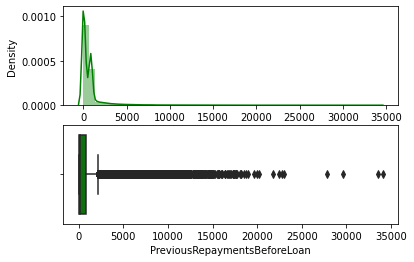

In [124]:
fig, axs = plt.subplots(nrows=2)
sns.distplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[0], color='green')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[1], color='green');

- Mean value of the repaid money by the defaulters before the loan is  861.138387
- Data very skewed to the right and this means that the defaulters repaid small amount of money with a mean value about 861
- There are alot of Ouliers.

#### We can see the relationship between features of the Defaluters :

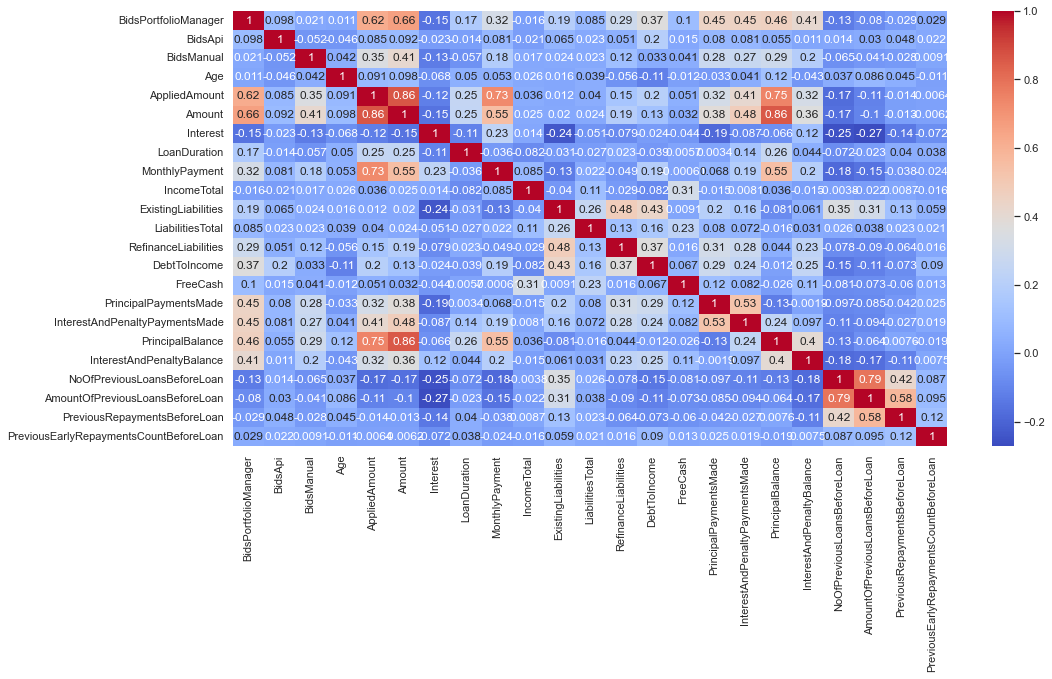

In [125]:
# Let's produce Heat Map
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df[df.LoanStatus == 'Default'].corr(), annot = True, fmt='.2g',cmap= 'coolwarm');

We notice that :
- There are featues that are positively correlated to each other.
- There are features that are negatively correlated to each other.
- Mostly, features are not correalted to each others.

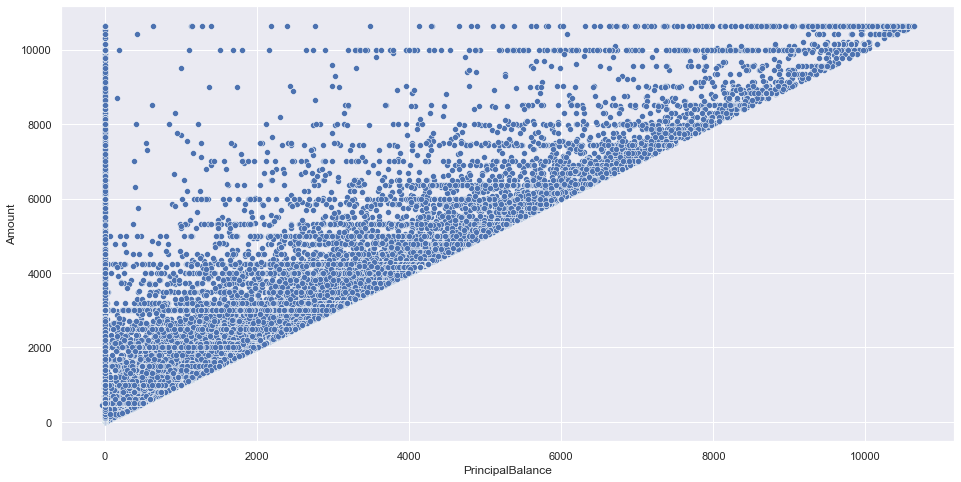

In [126]:
 # For Example : -  Amount and PriniaplBalance  
sns.scatterplot(x = df.PrincipalBalance, y = df.Amount)
plt.show();

## Feature Engineering:
<ul>
<li><a href="#intro">Handling Null values</a></li>
<li><a href="#wrangling">Handling outliers</a></li>
<li><a href="#wrangling">Feature Selection</a></li>
<li><a href="#eda">Categorical Features Encoding</a></li>
<li><a href="#conclusions">Feature scaling</a></li>
<li><a href="#conclusions">Dimensionality Reduction using PCA</a></li>
<li><a href="#conclusions">Building Models</a></li>
</ul>

### 1. Handling Null values:
- We have already handled them in the previous work.

### 2. Handling outliers:

###### What are the criteria to identify an outlier?

a - Data point that falls outside of 1.5 times of an interquantile range above the 3rd quartile and below the 1st quartile.

b - Data point that falls outside of 3 standard deviations. We can use a Z-score, and if the Z-score falls outside of 2 standard deviation. 

###### How can we find the outliers?
- Using Scatter plots. 
- Using Box plots.
- Using Z-score.
- Using the interquartile range (IQR).

<AxesSubplot:xlabel='PreviousRepaymentsBeforeLoan'>

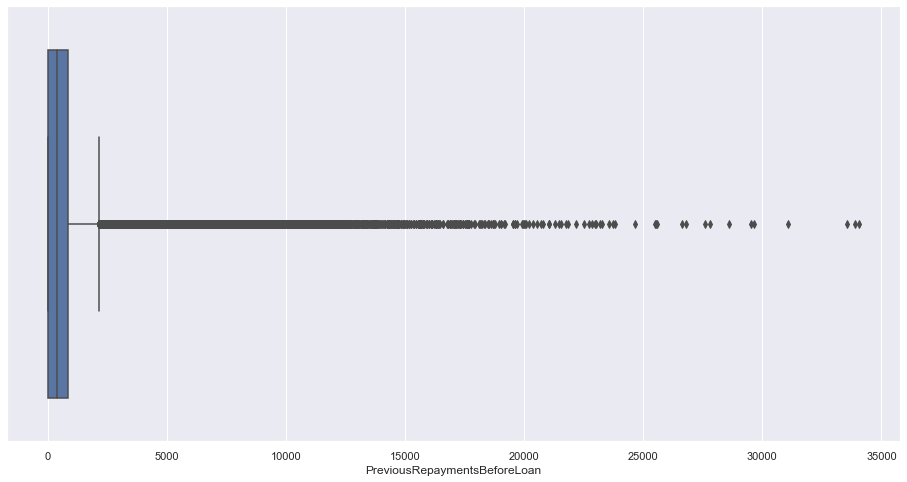

In [127]:
sns.boxplot(df.PreviousRepaymentsBeforeLoan)

In [128]:
# Let's compute IQR for each numerical feature
df_IQR = df[df.select_dtypes([float, int]).columns].quantile(.75) - df[df.select_dtypes([float, int]).columns].quantile(.25)
df_IQR 

BidsPortfolioManager                      1383.000000
BidsApi                                      5.000000
BidsManual                                 726.000000
Age                                         18.000000
AppliedAmount                             2980.000000
Amount                                    2445.000000
Interest                                    26.910000
LoanDuration                                24.000000
MonthlyPayment                             119.037500
IncomeTotal                               1110.000000
ExistingLiabilities                          4.000000
LiabilitiesTotal                           622.960000
RefinanceLiabilities                         0.000000
DebtToIncome                                20.790000
FreeCash                                   269.007500
PrincipalPaymentsMade                     1389.602500
InterestAndPenaltyPaymentsMade             574.965000
PrincipalBalance                          2111.980000
InterestAndPenaltyBalance   

In [129]:
# Let's compute maximum and minimum limits
df_Max =  df[df.select_dtypes([float, int]).columns].quantile(.75) + (1.5*df_IQR)
df_Min =  df[df.select_dtypes([float, int]).columns].quantile(.25) - (1.5*df_IQR)
df_Max

BidsPortfolioManager                      3703.500000
BidsApi                                     12.500000
BidsManual                                1834.000000
Age                                         75.000000
AppliedAmount                             8190.000000
Amount                                    6852.500000
Interest                                    90.695000
LoanDuration                                96.000000
MonthlyPayment                             340.663750
IncomeTotal                               3665.000000
ExistingLiabilities                         11.000000
LiabilitiesTotal                          1670.440000
RefinanceLiabilities                         0.000000
DebtToIncome                                51.975000
FreeCash                                   672.518750
PrincipalPaymentsMade                     3535.696250
InterestAndPenaltyPaymentsMade            1474.862500
PrincipalBalance                          5279.950000
InterestAndPenaltyBalance   

###### We can Handling the outliers of each numerical feature :

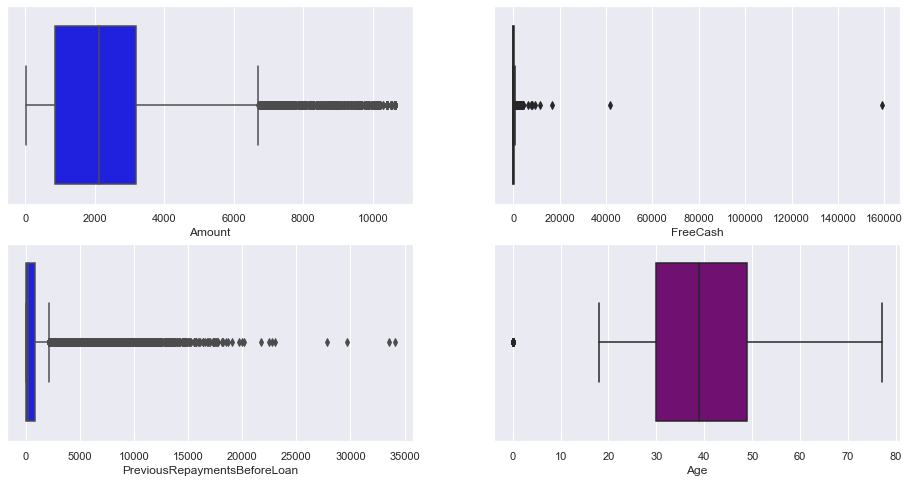

In [130]:
#Box plots before handling outliers
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[1,0], color='blue');

sns.boxplot(df.FreeCash[df.LoanStatus=='Default'], ax=axs[0,1], color='purple')
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[1,1], color='purple');

In [131]:
df.select_dtypes([float, int]).columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

In [132]:
col_IQR = df['Age'].quantile(.75) - df['Age'].quantile(.25)
col_Max =  df['Age'].quantile(.75) + (1.5*col_IQR)
col_Max

75.0

Now we will replace outliers of each column with Lower and Upper bounds of each column:

In [133]:
# Loop for replacing outliers above upper bound with the upper bound value:
for column in df.select_dtypes([float, int]).columns :
   
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Max =  df[column].quantile(.75) + (1.5*col_IQR)
    df[column][df[column] > col_Max] =  col_Max

In [134]:
# Loop for replacing outliers under lower bound with the lower bound value:
for column in df.select_dtypes([float, int]).columns :
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Min =  df[column].quantile(.25) - (1.5*col_IQR)
    df[column][df[column] < col_Min] =  col_Min

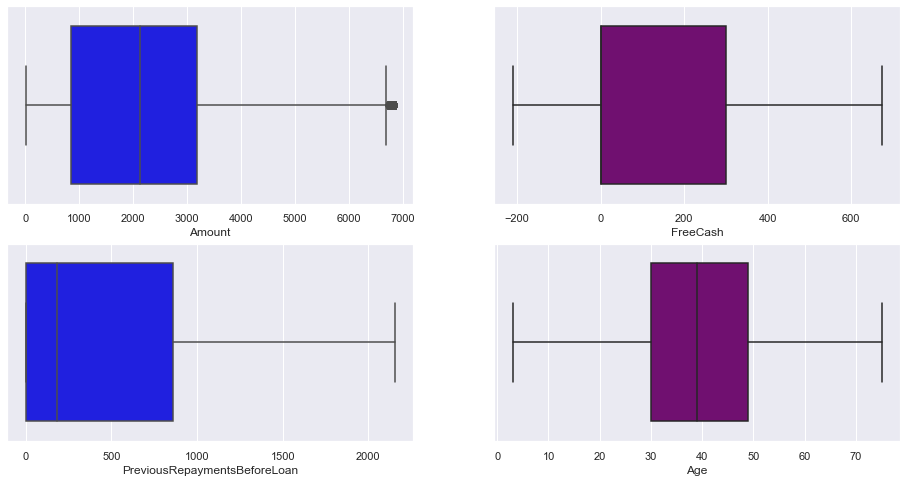

In [135]:
# Check, boxplot after handling outliers:
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[1,0], color='blue');

sns.boxplot(df.FreeCash[df.LoanStatus=='Default'], ax=axs[0,1], color='purple')
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[1,1], color='purple');


## 4. Feature Encoding

###### Let's divide our features to "Target" feature and "Independnt features" :

In [136]:
y = df.LoanStatus
x = df.drop(columns = ['LoanStatus'])


In [137]:
x

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0.0,0.0,115.0410,True,"Income unverified,cross-referenced by phone",Estonian,61,Female,EE,319.5582,115.0408,30.00,12,130.393314,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,False,M,115.0408,20.4222,0.00,0.0000,1.0,83.0852,0.0000,0
1,0.0,0.0,140.6057,False,"Income unverified,cross-referenced by phone",Estonian,48,Female,EE,191.7349,140.6057,25.00,1,130.393314,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,False,M,140.6057,2.0227,0.00,0.0000,2.0,255.6467,258.6256,0
2,0.0,0.0,319.5580,True,"Income unverified,cross-referenced by phone",Estonian,58,Female,EE,319.5582,319.5409,25.00,20,130.393314,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,True,M,203.1909,59.7626,116.35,414.0700,0.0,0.0000,0.0000,0
3,0.0,0.0,57.5205,True,"Income unverified,cross-referenced by phone",Estonian,23,Female,EE,127.8233,57.5205,45.00,15,130.393314,Loan consolidation,Basic education,Single,Not present,UpTo2Years,Other,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,False,M,57.5205,18.7323,0.00,0.0000,1.0,134.2144,0.0000,0
4,0.0,0.0,319.5582,True,"Income unverified,cross-referenced by phone",Estonian,25,Female,EE,319.5582,319.5436,30.00,12,130.393314,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,False,M,319.5436,220.4200,0.00,0.0000,1.0,146.9966,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515.0,0.0,485.0000,True,Income verified,Finnish,37,Male,FI,3000.0000,3000.0000,31.01,60,107.680000,Loan consolidation,Vocational education,Single,Fully employed,MoreThan5Years,Other,Council house,1400.0,1,500.00,0,7.69,672.51875,E,False,M,2308.1900,0.0000,0.00,0.0000,0.0,0.0000,0.0000,0
134525,1880.0,0.0,1120.0000,False,Income verified,Finnish,35,Male,FI,3000.0000,3000.0000,18.25,60,85.330000,Home improvement,Vocational education,Single,Fully employed,MoreThan5Years,Transport and warehousing,Owner,2265.0,5,1670.44,0,31.58,520.67000,B,False,M,3000.0000,1474.8625,0.00,0.0000,1.0,3000.0000,389.3600,0
134526,1975.0,0.0,525.0000,True,Income unverified,Finnish,40,Male,FI,2500.0000,2500.0000,24.83,60,80.420000,Loan consolidation,Vocational education,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,672.51875,D,False,M,1869.7600,199.3300,630.24,1227.9800,0.0,0.0000,0.0000,0
134527,1840.0,0.0,1160.0000,False,Income and expenses verified,Estonian,47,Female,EE,3000.0000,3000.0000,17.74,60,84.510000,Other,Higher education,Married,Fully employed,MoreThan5Years,Healthcare and social help,"Tenant,pre-furnished property",540.0,8,732.05,0,44.35,50.49000,B,True,M,2257.5400,561.5300,0.00,0.0000,1.0,500.0000,96.8000,0


In [138]:
# Let's perform categorical features encoding:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [139]:
# Target_feature Encoding:
y = LE.fit_transform(y)

In [140]:
# Ind_features Encoding:
for feature in x.select_dtypes([object, bool]).columns:
    x[feature]= LE.fit_transform(x[feature])

In [141]:
x

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0.0,0.0,115.0410,1,2,1,61,0,0,319.5582,115.0408,30.00,12,130.393314,10,5,2,1,6,17,6,3665.0,0,0.00,0,0.00,0.00000,6,0,0,115.0408,20.4222,0.00,0.0000,1.0,83.0852,0.0000,0
1,0.0,0.0,140.6057,0,2,1,48,0,0,191.7349,140.6057,25.00,1,130.393314,10,1,1,1,0,5,6,3665.0,0,0.00,0,0.00,0.00000,6,0,0,140.6057,2.0227,0.00,0.0000,2.0,255.6467,258.6256,0
2,0.0,0.0,319.5580,1,2,1,58,0,0,319.5582,319.5409,25.00,20,130.393314,7,4,2,1,7,9,6,3665.0,0,0.00,0,0.00,0.00000,6,1,0,203.1909,59.7626,116.35,414.0700,0.0,0.0000,0.0000,0
3,0.0,0.0,57.5205,1,2,1,23,0,0,127.8233,57.5205,45.00,15,130.393314,8,0,4,2,5,13,6,3665.0,0,0.00,0,0.00,0.00000,6,0,0,57.5205,18.7323,0.00,0.0000,1.0,134.2144,0.0000,0
4,0.0,0.0,319.5582,1,2,1,25,0,0,319.5582,319.5436,30.00,12,130.393314,15,4,0,1,5,17,6,3665.0,0,0.00,0,0.00,0.00000,6,0,0,319.5436,220.4200,0.00,0.0000,1.0,146.9966,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515.0,0.0,485.0000,1,3,2,37,1,2,3000.0000,3000.0000,31.01,60,107.680000,8,5,4,1,0,13,0,1400.0,1,500.00,0,7.69,672.51875,5,0,0,2308.1900,0.0000,0.00,0.0000,0.0,0.0000,0.0000,0
134525,1880.0,0.0,1120.0000,0,3,2,35,1,2,3000.0000,3000.0000,18.25,60,85.330000,7,5,4,1,0,18,8,2265.0,5,1670.44,0,31.58,520.67000,2,0,0,3000.0000,1474.8625,0.00,0.0000,1.0,3000.0000,389.3600,0
134526,1975.0,0.0,525.0000,1,1,2,40,1,2,2500.0000,2500.0000,24.83,60,80.420000,8,5,2,0,0,4,8,2500.0,2,1350.00,0,3.22,672.51875,4,0,0,1869.7600,199.3300,630.24,1227.9800,0.0,0.0000,0.0000,0
134527,1840.0,0.0,1160.0000,0,0,1,47,0,0,3000.0000,3000.0000,17.74,60,84.510000,10,1,2,1,0,8,10,540.0,8,732.05,0,44.35,50.49000,2,1,0,2257.5400,561.5300,0.00,0.0000,1.0,500.0000,96.8000,0


In [142]:
y

array([1, 1, 0, ..., 0, 0, 0])

## 3. Feature Selection
There are many types and techniques for feature selection such as:
1. Filter
- Correlation.
- Variance threshold.
- Chi-squared.
- Anova.
- Information gain.
2. Wrapper 
- Recursive Feature Elimination (RFE).
3. Embedded
- L1 and L2 Regularization Methods.



Now we will use correlation filter selection technique:

- Highly correlated features will be considered duplicated features while using the machine learning model, so we should drop them(drop one and leave the another).

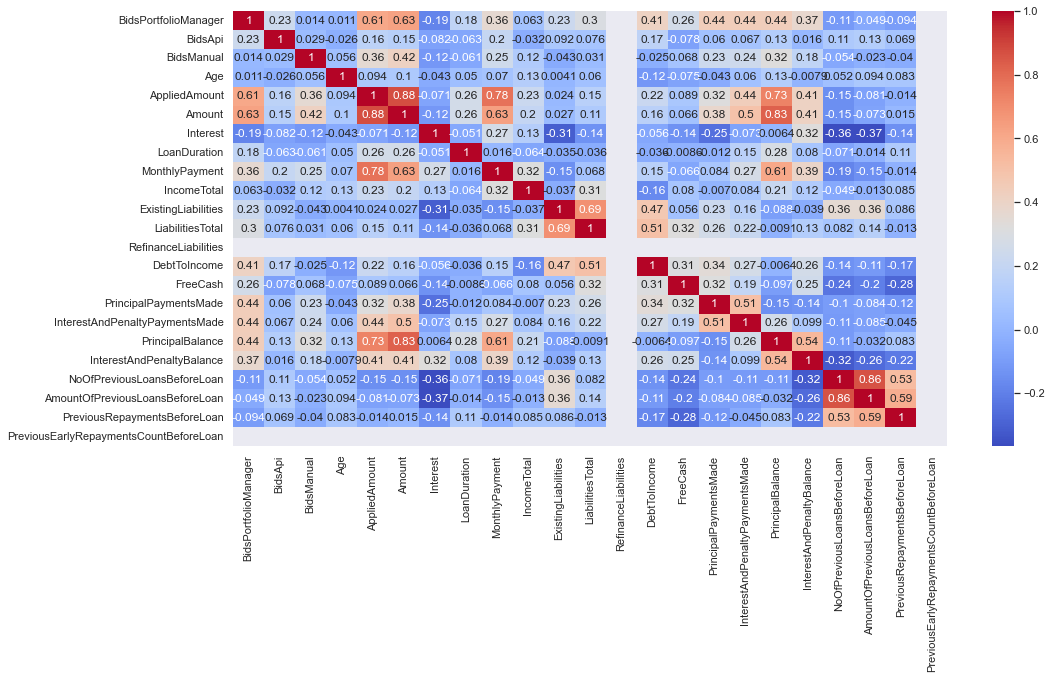

In [143]:
# Let's produce Heat Map
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df[df.LoanStatus == 'Default'].corr(), annot = True, fmt='.2g',cmap= 'coolwarm');

In [144]:
# A function to select highly correlated features.
def Correlation(dataset, threshold): 
    correltated_features = set() # as a container of highly correlated features
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                column_name = correlation_matrix.columns[i]
                correltated_features.add(column_name)
    return correltated_features

In [145]:
# let's selected features with a correlation factor > 0.8
Correlation(x, 0.8)

{'Amount', 'AmountOfPreviousLoansBeforeLoan', 'NoOfPreviousLoansBeforeLoan'}

In [146]:
# Now we can drop these features from our dataset
x.drop(columns= ['Amount', 'AmountOfPreviousLoansBeforeLoan', 'NoOfPreviousLoansBeforeLoan'], inplace = True )

Now we will use Scikit learn library for feature selection

In [147]:
# Feature selection using sklearn
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, mutual_info_classif, f_classif

In [148]:
# using mutual_info_classif to choose our features
features = SelectKBest(mutual_info_classif, k=18)
# Selected features
Selected_features =   features.fit_transform(x, y)

In [149]:
# Display selected features
x.columns[features.get_support()]

Index(['BidsPortfolioManager', 'BidsManual', 'LanguageCode', 'Country',
       'AppliedAmount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'IncomeTotal', 'LiabilitiesTotal', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'PreviousRepaymentsBeforeLoan'],
      dtype='object')

## 5. Feature Scaling

There are two major types of feature scaling :
-  Standardization.
- Normalization.

We can use StandardScalar to scale our data:
- StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.
- The values will lie be between -1 and 1.

In [150]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [152]:
Standard_Scalar = StandardScaler()

In [153]:
Selected_features = Standard_Scalar.fit_transform(Selected_features)

In [154]:
Selected_features

array([[-0.98790672, -0.67020738, -0.78211045, ..., -0.79905024,
        -0.68715899, -0.87327162],
       [-0.98790672, -0.62474604, -0.78211045, ..., -0.79905024,
        -0.68715899, -0.48536767],
       [-0.98790672, -0.30651778, -0.78211045, ..., -0.72540153,
        -0.26207894, -0.87327162],
       ...,
       [ 0.80074606,  0.05881674, -0.36690548, ..., -0.40011288,
         0.57347279, -0.87327162],
       [ 0.67848372,  1.18802798, -0.78211045, ..., -0.79905024,
        -0.68715899, -0.72808452],
       [ 1.71997775, -0.85700026, -0.78211045, ...,  0.16695368,
         2.09486096, -0.50934394]])

## 6. Feature Extraction and Dimensionality-reduction using (PCA) 


Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information. 

The idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

PCA steps:
- Feature Scaling.
- Covariance Matrix computation.
- Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components.
- Feature Vector. 
- Recast the Data Along the Principal Components Axes.

In [155]:
# importing PCA class
from sklearn.decomposition import PCA

In [156]:
# Create a PCA object
pca = PCA(n_components = 2) 

In [157]:
# Let's fit our data using PCA
Selected_features_pca =  pca.fit_transform(Selected_features)


In [158]:
Selected_features_pca.shape

(77394, 2)

In [159]:
Selected_features_pca.shape

(77394, 2)

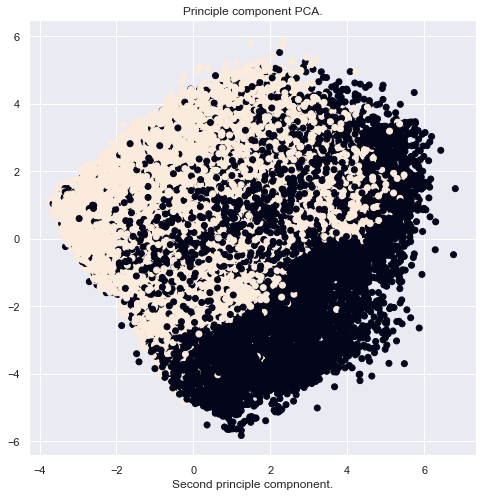

In [160]:
plt.figure(figsize=(8, 8))
plt.scatter(Selected_features_pca[:,0], Selected_features_pca[:,1], c = y)
plt.title('Principle component PCA.')
plt.xlabel("First principle compnonent.")
plt.xlabel("Second principle compnonent.")
plt.show();

Explained Variance:
- Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method.
- it tells us how much of the total variance is “explained” by each component.
- the larger the variance explained by a principal component, the more important that component is. 
- The amount of variance explained by each direction is called the “explained variance.
- Explained variance can be used to choose the number of dimensions to keep in a reduced dataset. It can also be used to assess the quality of a machine learning model. In general, a model with high explained variance will have good predictive power, while a model with low explained variance may not be as accurate.
- Explained variance can also be used to compare different PCA models. For example, if we compare two models that both reduce a dataset from 10 dimensions to 2, but one explains 80% of the variance and the other explains 95% of the variance, we would say that the latter model is better at representing the data.


- Example : While you can convert 4-d space to 2-d space, you lose some of variance (information), by using explained_variance_ratio_, you can see the first principle component contains say 72.77% of the variance and the second principle component contains say  23.03% of the variance. Together the two compnenets contain 95.80% of the information.

In [161]:
pca.explained_variance_ratio_

array([0.21285364, 0.1741362 ])

In [162]:
# Percentage of information we have after apllying 2-d PCA
sum(pca.explained_variance_ratio_) * 100

38.69898392645612

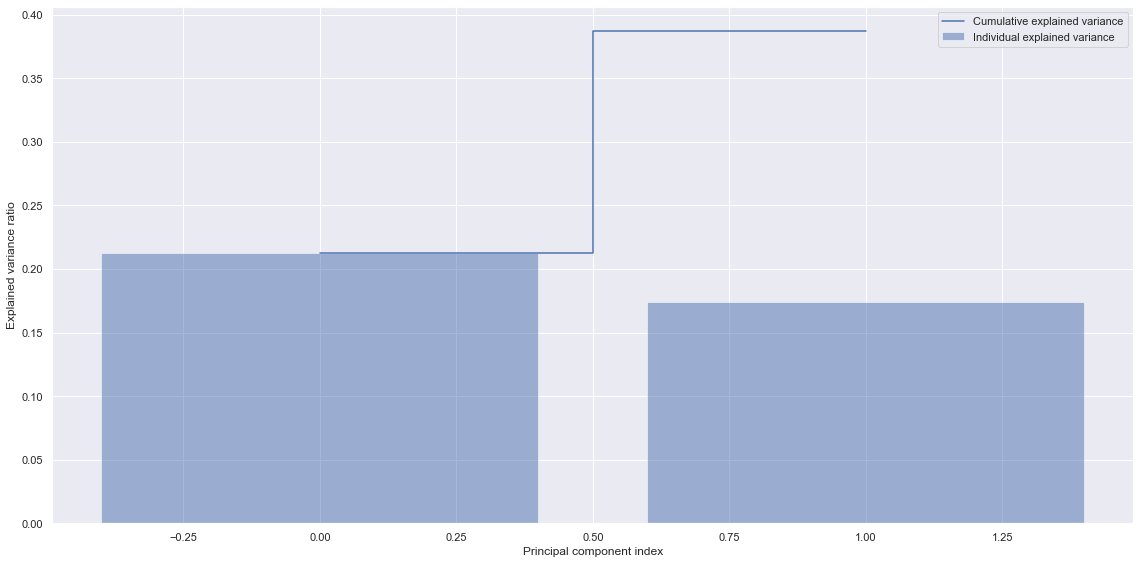

In [164]:
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- After trying the PCA with different parameters we didn't get a good accuracy, so we decided to not use it in our work.

## Building Our Models

- Now we will split our data into training and testing sets and make the data ready for the machine learning algorithm.
- We can use :
        - Train Test Split.
        -  K-Fold Cross-Validation.

In [165]:
# Let's use Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Selected_features, y, random_state=42, train_size = 0.8)

### We will use two models in our work:
#### 1- Logistic Regression model
#### 2- Random Forrest model

#### 1. Logistic Regression Model

In [166]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [167]:
# Let's make LogisticRegression and RandomForestClassifier object
LR = LogisticRegression()

In [168]:
# Let's fit the model on our data
LR.fit(X_train, y_train)

LogisticRegression()

In [169]:
# Let's fit the model on our data
LR.fit(X_train, y_train)

LogisticRegression()

In [170]:
# Let's make predictions
y_predict = LR.predict(X_test)

 Logistic Regression Model Evaluation

In [171]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [172]:
# accuracy_score of LogisticResgression model
accuracy_score(y_test, y_predict)

0.8893985399573616

In [173]:
roc_auc_score(y_test, y_predict)

0.8958145837872208

In [174]:
# confusion matrix
confusion_matrix(y_test, y_predict)

array([[7233, 1385],
       [ 327, 6534]], dtype=int64)

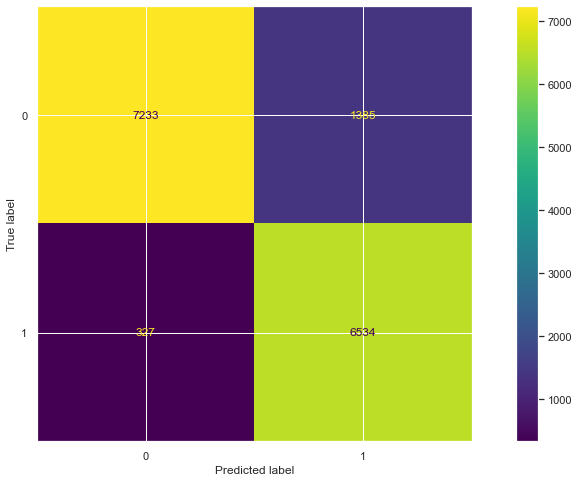

In [175]:
# plot confusion matrix 
plot_confusion_matrix(LR, X_test, y_test);

## Random Forest implementation

In [176]:
# Let's use Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Selected_features, y, random_state=42, train_size = 0.8)

In [177]:
# Import Logistic Regression model
from sklearn.ensemble import RandomForestClassifier

In [178]:
# Let's make LogisticRegression and RandomForestClassifier object
RFC = RandomForestClassifier()

In [179]:
# Let's fit the model on our data
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [180]:
# Let's make predictions
y_predict = RFC.predict(X_test)

##### Random Forst Model Evaluation

In [181]:
# accuracy_score of LogisticResgression model
accuracy_score(y_test, y_predict)

0.9421151237160024

In [182]:
roc_auc_score(y_test, y_predict)

0.9456237117588324

In [183]:
# confusion matrix
confusion_matrix(y_test, y_predict)

array([[7883,  735],
       [ 161, 6700]], dtype=int64)

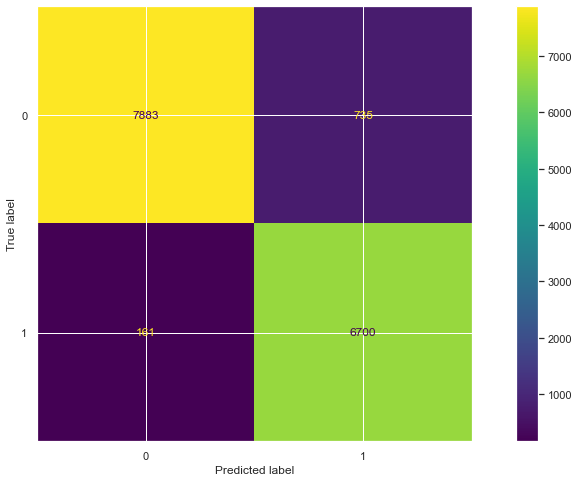

In [184]:
# plot confusion matrix 
plot_confusion_matrix(RFC, X_test, y_test);

### Building Models Conclusion:
#### By using the two models with the same features, we discovered that the Random Forest Classifier model gives accuracy better than the Logistic Regression model